# PR 02 SPSF

Sebuah partikel bermuatan $q$ bergerak dengan kecepatan

$\vec{v}(t) = v_{x}(t)\hat{i}+v_{y}(t)\hat{j}$

dalam ruang bermedan magnetik konstan,

$\vec{B} = -\vec{k}B_{z}$

Tentukan gerak partikel.

# SOAL



1.   Tuliskan Hukum Newtonnya.
2.   Tuliskan persamaan diferensial terkopel antara kecepatan pada kedua arah.
3.   Selesaikan kedua persamaan diferensial sehingga dapat diperoleh $v_{x}(t), v_{y}(t), x(t),$ dan $y(t)$. Lakukan secara teori.
4.   Perolehlah solusi numeriknya.
5.   Bandingkan hasil kedua pendekatan: teori dan numerik!




# Jawaban 1
Pada partikel tersebut, berlaku Hukum II Newton yang dirumuskan dengan 

$\sum\vec{F} = m \vec{a}\tag{1}$

dimana $\sum\vec{F}$ adalah total gaya yang bekerja pada partikel, $m$ adalah massa partikel, dan $a$ adalah percepatan partikel yang berkaitan dengan kecepatan partikel $v$. Dalam kasus ini, kecepatan partikel dibagi menjadi komponen $v_{x}(t)$ dalam arah $\hat{i}$ dan $v_{y}(t)$ dalam arah $\hat{j}$. Sementara total gaya yang bekerja pada partikel adalah gaya yang disebabkan oleh medan magnetik \vec{B}. Maka, Hukum II Newton untuk kasus ini dapat dituliskan sebagai 

$q\vec{v}\times \vec{B} = m\vec{a}\tag{2}$

# Jawaban 2
$a_{x} = ...?$, $a_{y} = ...?$

$q[(v_{x}\hat{i} + v_{y}\hat{j})\times(-B_{z}\hat{k})] = m(a_{x}\hat{i}+a_{y}\hat{j})\tag{3}$

$q[v_{x}B_{z}\hat{j} + (-v_{y}B_{z}\hat{i})] = m(a_{x}\hat{i}+a_{y}\hat{j})\tag{4}$

diperoleh $a_{x}$

$$a_{x} = \frac{-qB_{z}v_{y}}{m}$$

$\frac{\partial{v_{x}}}{\partial{t}} = \frac{-qB_{z}v_{y}}{m}\tag{5}$
        
dan $a_{y}$

$$a_{y} = \frac{qB_{z}v_{x}}{m}$$


$\frac{\partial{v_{y}}}{\partial{t}} = \frac{qB_{z}v_{x}}{m}\tag{6}$

# Jawaban 3
Dari persamaan (5) dan persamaan (6), diperoleh persamaan diferensial terkopel

$$\frac{\partial{v_{x}}}{\partial{t}} = (\frac{-qB_{z}}{m})v_{y}$$

$$\frac{\partial{v_{y}}}{\partial{t}} = (\frac{qB_{z}}{m})v_{x}$$.

selanjutnya ditinjau persamaan 

$\frac{\partial{v_{x}}}{\partial{t}} = -pv_{y}\tag{9}$

maka didapatkan,

$$\frac{\partial^2v_{x}}{\partial{t}} + p^2v_{x} = 0$$

$v_{x}(t) = v_{m}cos(pt)\tag{10}$


$$\frac{\partial^2v_{y}}{\partial{t}} + p^2v_{y} = 0$$

$v_{y}(t) = v_{m}sin(pt)\tag{11}$


nilai $x(t)$ dan $y(t)$,

$x(t) = \int{v_{x} dt} = \frac{v_{m}}{p} sin(pt)+x_{0}\tag{12}$


$y(t) = \int{v_{y} dt} = \frac{v_{m}}{p} cos(pt)+y_{0}\tag{13}$.

# Jawaban 4

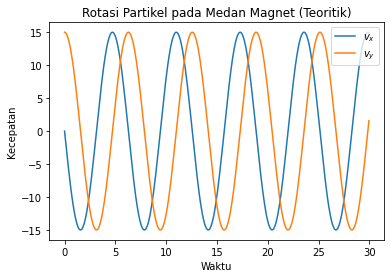

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 30, 0.05)
vx = -15*np.sin(t)
vy = 15*np.cos(t)

plt.figure()
plt.plot(t, vx, label='$v_x$')
plt.plot(t, vy, label='$v_y$')
plt.title('Rotasi Partikel pada Medan Magnet (Teoritik)')
plt.xlabel('Waktu')
plt.ylabel('Kecepatan')
plt.legend(loc=1)
plt.show()

# Jawaban 5

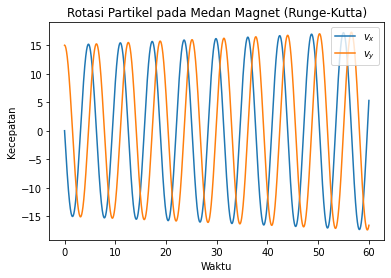

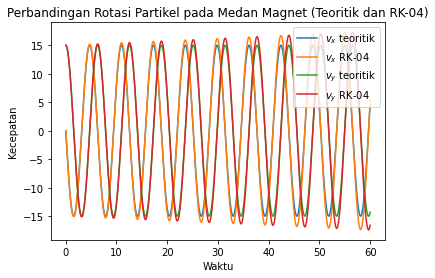

In [ ]:
# Runge-Kutta orde 4
def runkut4(F, t, x, y, h):
    k0 = h*F(t, x, y)
    k1 = h*F(t + h/2, x + k0/2, y)
    k2 = h*F(t + h/2, x + k1/2, y)
    k3 = h*F(t + h, x + k2, y)
    return(k0 + 2*k1 + 2*k2 + k3)/6

# Persamaan diferensial terkopel
def vx_kop(t, vx, vy, q=1, Bz=1, m=1):
    return -q*Bz/m*vy

def vy_kop(t, vy, vx, q=1, Bz=1, m=1):
    return q*Bz/m*vx

# Input parameter
vx0 = 0
vy0 = 15 
t0 = 0
t_stop = 60
h = 0.005

vxs=[vx0]
vys=[vy0]
ts=[t0]

# Grafik solusi dengan metode Runge-Kutta orde 4

while ts[-1] < t_stop:
    h = min(h, t_stop - ts[-1])
    vx = vxs[-1] + runkut4(vx_kop,ts[-1],vxs[-1],vys[-1],h)
    vy = vys[-1] + runkut4(vy_kop,ts[-1],vys[-1],vxs[-1],h)
    t = ts[-1] + h
    
    ts.append(t)
    vxs.append(vx)
    vys.append(vy)

plt.figure()
plt.plot(ts, vxs, label='$v_x$')
plt.plot(ts, vys, label='$v_y$')
plt.title('Rotasi Partikel pada Medan Magnet (Runge-Kutta)')
plt.xlabel('Waktu')
plt.ylabel('Kecepatan')
plt.legend(loc=1)
plt.show()

# Grafik perbandingan teoritik dan Runge-Kutta orde 4

t = np.arange(0, 60, 0.005)
vx = -15*np.sin(t)
vy = 15*np.cos(t)

plt.figure()
plt.plot(t, vx, label='$v_x$ teoritik')
plt.plot(ts, vxs, label='$v_x$ RK-04')
plt.plot(t, vy, label='$v_y$ teoritik')
plt.plot(ts, vys, label='$v_y$ RK-04')
plt.title('Perbandingan Rotasi Partikel pada Medan Magnet (Teoritik dan RK-04)')
plt.xlabel('Waktu')
plt.ylabel('Kecepatan')
plt.legend(loc=1)
plt.show()